<a href="https://colab.research.google.com/github/Zac-Sells/MLA_ZTS/blob/main/MLA2_ZTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [7]:
df.rename(columns={'Usage_kWh':'usage_kwh'},inplace=True)
df.rename(columns={'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh'},inplace=True)
df.rename(columns={'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh'},inplace=True)
df.rename(columns={'Lagging_Current_Power_Factor':'lag_current_pwr'},inplace=True)
df.rename(columns={'Leading_Current_Power_Factor':'lead_current_pwr'},inplace=True)
df.rename(columns={'NSM':'nsm'},inplace=True)
df.rename(columns={'WeekStatus':'week_status'},inplace=True)
df.rename(columns={'Day_of_week':'day_of_week'},inplace=True)
df.rename(columns={'Load_Type':'load_type'},inplace=True)

In [8]:
df.describe()

,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [24]:
loadTypes = df['load_type'].groupby(df['load_type']).count()
loadTypes

,load_type
load_type,
Light_Load,18072
Maximum_Load,7272
Medium_Load,9696


<Axes: xlabel='load_type'>

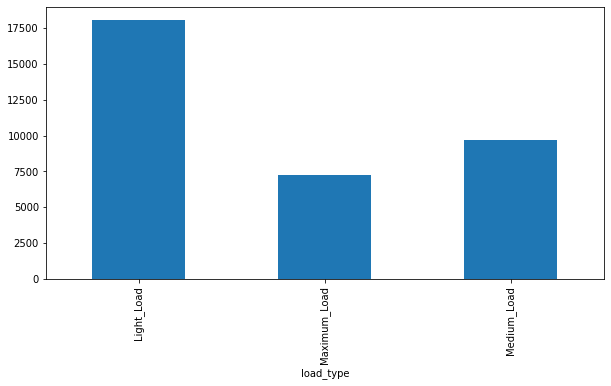

In [37]:
loadTypes.plot(kind='bar',figsize=(10,5))

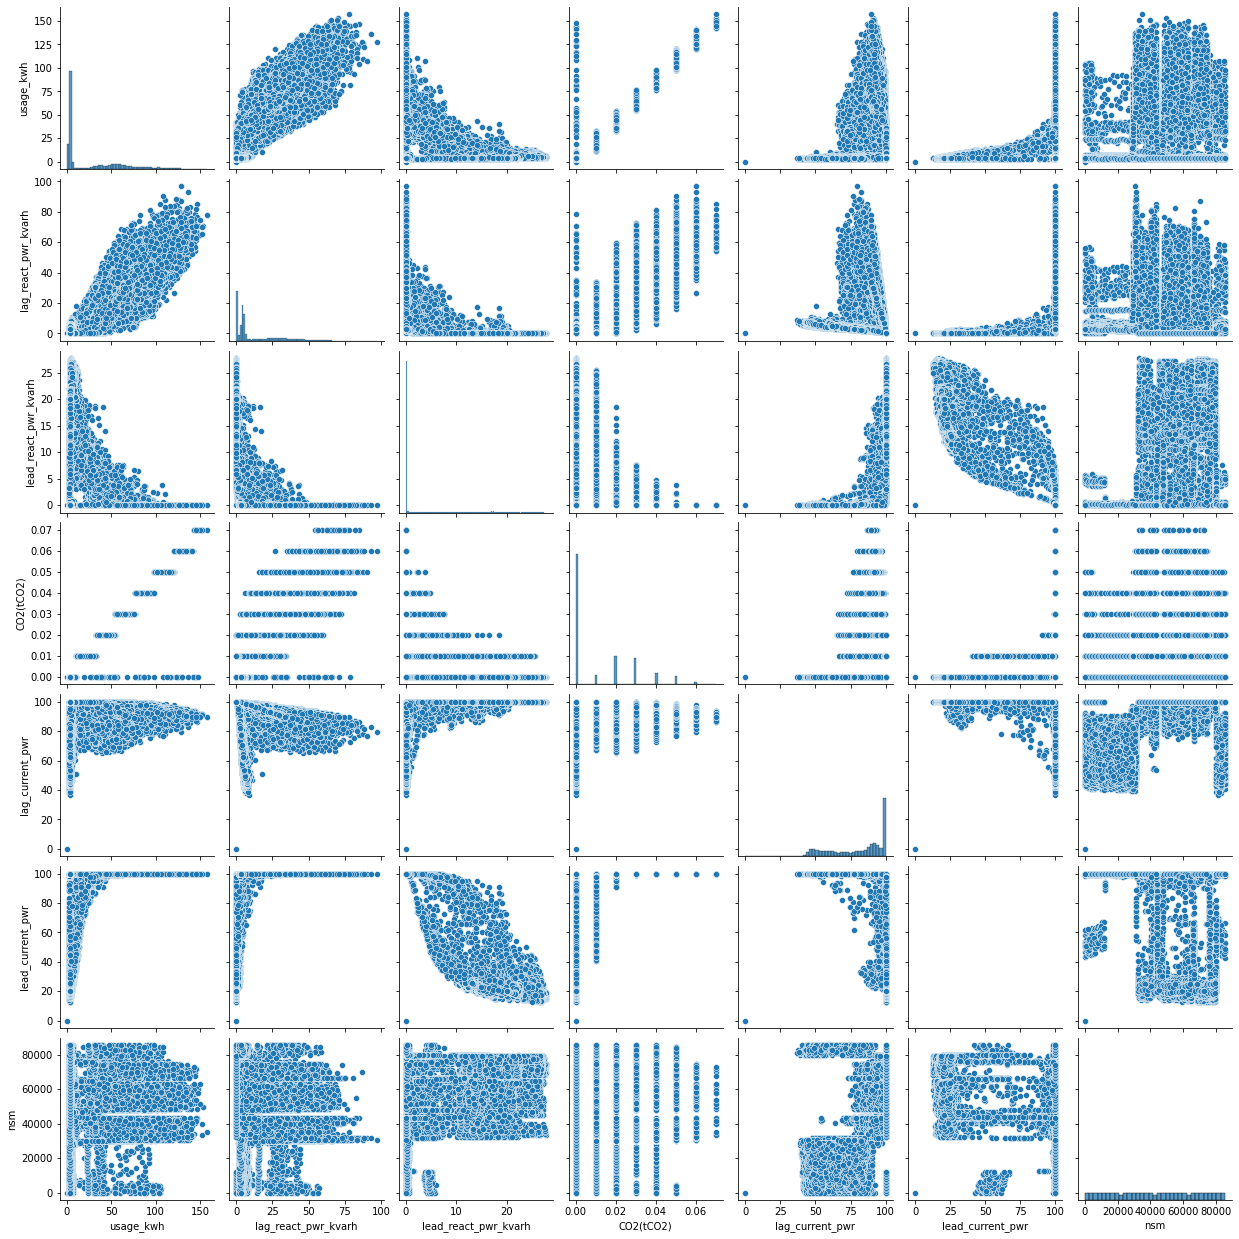

In [38]:
sns.pairplot(df)

I do not recongnize any paterns. Honestly the data in this particular pair plot is difficult to read.

In [39]:
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [44]:
from sklearn.model_selection import train_test_split

In [41]:
X = np.array(df[['lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm','week_status','day_of_week','load_type']])
y = np.array(df['usage_kwh'])


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [47]:
X = df[['lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm','week_status','day_of_week','load_type']]
y = df['usage_kwh']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [49]:
num_attribs = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm']
cat_attribs = ['week_status', 'day_of_week','load_type']

In [52]:
col_transform = ColumnTransformer(transformers=[('cat',OneHotEncoder(), cat_attribs)],remainder='passthrough')